In [16]:
from IPython.display import Image
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
from scipy.stats import scoreatpercentile
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame

import os
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

import mglearn
import tflearn
from tflearn.data_utils import load_image

print ("NumPy version", np.__version__)
print ("SciPy version", scipy.__version__)
print ("Pandas version", pd.__version__)

NumPy version 1.12.1
SciPy version 0.19.0
Pandas version 0.20.1


In [17]:
SCRIPT_PATH = '/Users/cesare.chung/int/01_CODE_UNET/'
#
imgs = []
num = 5
for i in range(1, num + 1):
    img = load_image("%s/train/%s.jpg" % (SCRIPT_PATH, i))
#    img = img.resize((224,224))
    img = img.resize((270,506))
    img_arr = np.asarray(img)
    imgs.append(img_arr)
#
imgs = np.array(imgs)

imgs


array([[[[144, 134, 143, 255],
         [156, 146, 156, 255],
         [167, 156, 167, 255],
         ..., 
         [161, 155, 162, 255],
         [161, 155, 162, 255],
         [161, 155, 162, 255]],

        [[145, 134, 143, 255],
         [157, 146, 156, 255],
         [166, 156, 166, 255],
         ..., 
         [165, 158, 166, 255],
         [165, 158, 166, 255],
         [165, 158, 166, 255]],

        [[145, 134, 144, 255],
         [155, 145, 154, 255],
         [163, 153, 163, 255],
         ..., 
         [165, 158, 166, 255],
         [165, 158, 166, 255],
         [165, 158, 166, 255]],

        ..., 
        [[160, 156, 176, 255],
         [160, 155, 176, 255],
         [160, 154, 176, 255],
         ..., 
         [150, 143, 164, 255],
         [145, 141, 158, 255],
         [143, 140, 156, 255]],

        [[159, 155, 174, 255],
         [159, 154, 174, 255],
         [159, 153, 175, 255],
         ..., 
         [149, 143, 163, 255],
         [145, 141, 158, 255],
    

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


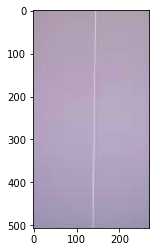

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


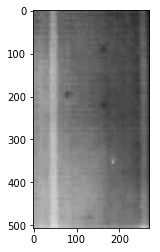

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


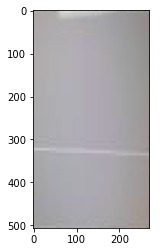

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


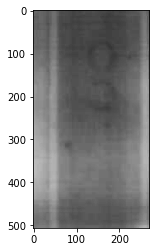

Mura Images Shape = (506, 270, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


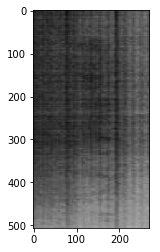

In [18]:
#################################
# Show pictures / shape         #
#################################
for i in range(num):
    input_image = imgs[i]
    print ('Mura Images Shape = {}'.format(input_image.shape))
    print ('Mura Images Dim.  = {}'.format(input_image.ndim))
    print ('Mura Images Type  = {}'.format(input_image.dtype))
    plt.imshow(imgs[i])
    plt.show()
#

imgs = imgs / 255
#imgs = imgs.reshape(1,224, 224,4)
imgs = imgs.transpose(0,3,1,2)


In [19]:
##################################################################### 506 X 270 X 4

Image0 = imgs[0]
Image0 = imgs[4,0]      # Set the input images

#Image0 = imgs[1,0]
#Image0 = imgs[1,1]
#Image0 = imgs[1,2]
#Image0 = imgs[1,3]

Size0 = Image0.shape[0] * Image0.shape[1]
print('Images Data Points = {}'.format(Size0))

Image0.size
xmax = Image0.shape[0]
ymax = Image0.shape[1]

Image0[20,20]


Images Data Points = 136620


0.21176470588235294

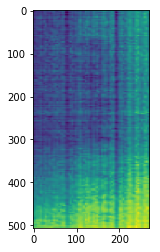

In [25]:
fig=plt.imshow(Image0)
plt.show()
#plt.draw()
plt.savefig('./docs/101.jpg')



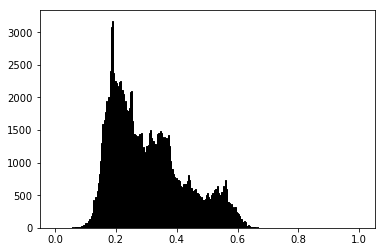

In [23]:

# Examining a specific data range
plt.hist(Image0.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
# Examining a specific data range
plt.show()
